In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

# 自定义的函数模块
from functions.data import prepare_dataset
from functions.model import UNet

In [2]:
train_data, test_data = prepare_dataset("Lucchi++") # Lucchi++ /  Kasthuri++ / VNC
# # Path to the chest-ct-segmentation dataset folder
# data_dir = "dataset\Lucchi++" 
# train_images_dir = os.path.join(data_dir, "Train_In")
# train_masks_dir = os.path.join(data_dir, "Train_Out")
# test_images_dir = os.path.join(data_dir, "Test_In")
# test_masks_dir = os.path.join(data_dir, "Test_Out")


# i = 0
# # Prepare the training data, Append image and corresponding mask paths
# train_data = []
# for image_file in os.listdir(train_images_dir):
#     image_path = os.path.join(train_images_dir, image_file)
#     mask_path = os.path.join(train_masks_dir, f"{i}.png")
#     i += 1
#     train_data.append(
#     { 
#         "image" : image_path, 
#         "annotation" : mask_path
#     })

# i = 0
# # Prepare the test data, Append image and corresponding mask paths
# test_data = []
# for image_file in os.listdir(test_images_dir):
#     image_path = os.path.join(test_images_dir, image_file)
#     mask_path = os.path.join(test_masks_dir, f"{i}.png")
#     i += 1
#     test_data.append(
#     { 
#         "image" : image_path, 
#         "annotation" : mask_path
#     })
# print(train_data)



Train Data (Lucchi++): [{'image': 'dataset\\Lucchi++\\Train_In\\mask0000.png', 'annotation': 'dataset\\Lucchi++\\Train_Out\\0.png', 'index': 0}, {'image': 'dataset\\Lucchi++\\Train_In\\mask0001.png', 'annotation': 'dataset\\Lucchi++\\Train_Out\\1.png', 'index': 1}, {'image': 'dataset\\Lucchi++\\Train_In\\mask0002.png', 'annotation': 'dataset\\Lucchi++\\Train_Out\\2.png', 'index': 2}, {'image': 'dataset\\Lucchi++\\Train_In\\mask0003.png', 'annotation': 'dataset\\Lucchi++\\Train_Out\\3.png', 'index': 3}, {'image': 'dataset\\Lucchi++\\Train_In\\mask0004.png', 'annotation': 'dataset\\Lucchi++\\Train_Out\\4.png', 'index': 4}, {'image': 'dataset\\Lucchi++\\Train_In\\mask0005.png', 'annotation': 'dataset\\Lucchi++\\Train_Out\\5.png', 'index': 5}, {'image': 'dataset\\Lucchi++\\Train_In\\mask0006.png', 'annotation': 'dataset\\Lucchi++\\Train_Out\\6.png', 'index': 6}, {'image': 'dataset\\Lucchi++\\Train_In\\mask0007.png', 'annotation': 'dataset\\Lucchi++\\Train_Out\\7.png', 'index': 7}, {'image'

In [3]:
from functions.data import SegmentationDataset

# 创建数据集
train_dataset = SegmentationDataset(
    data_list=train_data,          # 必需：数据列表
    patch_size=128,                # 可选：patch大小，默认128
    stride=128,                     # 可选：滑动步长，默认64
    transform=None,
    # preProcessing= None# 可选：数据增强转换，默认None
)

开始数据集预处理...


处理图像: 100%|██████████| 165/165 [00:19<00:00,  8.54it/s]

数据集预处理完成，共生成 7920 个patch


In [4]:
# 打印数据集基本信息
train_dataset.print_dataset_info()

# 随机查看几张图片的patches
# train_dataset.visualize_random_images(num_images=0, patches_per_image=6)



数据集信息:
总样本数: 7920
图像块大小: 128x128
滑动步长: 128
是否使用数据增强: 否

数据形状:
图像块形状: torch.Size([3, 128, 128])
掩码块形状: torch.Size([1, 128, 128])


In [5]:
# Add reconstruction function
from functions.model import reconstruct_from_patches

# Training function
from functions.model import train_model

# Inference function
from functions.model import predict


In [6]:
# 加载训练好的分割模型
from functions.model import load_model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 1 
model_path = "simple_unet_segmentation.pth"
model = load_model(model_path, device)

f:\github\segment-anything-2\functions\model.py:277: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


模型已从 simple_unet_segmentation.pth 加载


In [7]:
# Load the selected image and mask
image_path , mask_path = train_dataset.read_image(idx = 3)
print(image_path)
print(mask_path)

from functions.samPrediction import read_image
image, org_mask = read_image(image_path=image_path, mask_path=mask_path) 

dataset\Lucchi++\Train_In\mask0000.png
dataset\Lucchi++\Train_Out\0.png


In [8]:
# 获取预测的mask
predicted_mask = predict(model, image_path)

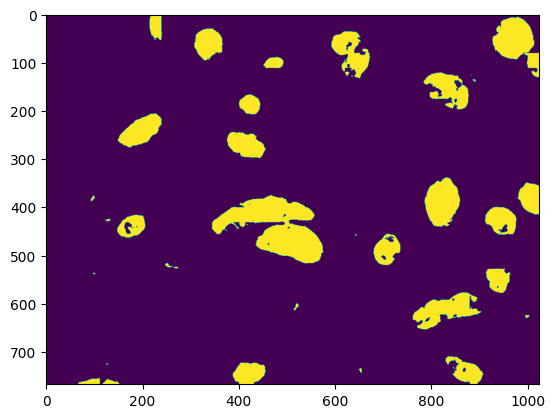

In [9]:
from functions.imagePreprocessing import ImagePreprocessor

from matplotlib import pyplot as plt

plt.imshow(predicted_mask)

# predicted_mask = ImagePreprocessor.advanced_denoise(
#     input_image=predicted_mask
# )

# plt.imshow(predicted_mask)

Creating SAM2 segmentation Model...
SAM2 segmentation Model Created!
Original Prediction IoU: 0.8272
Generating random points for the input......


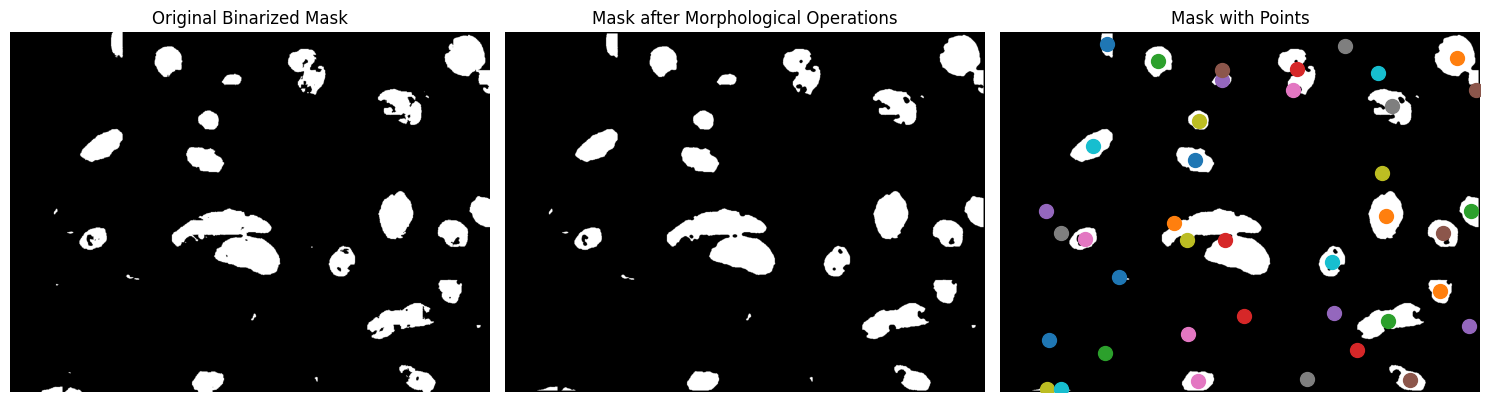

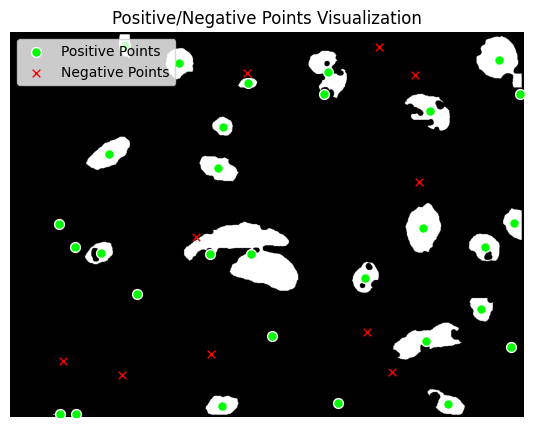

Generated 40 points for the input
输入点坐标维度: (40, 1, 2)
输入标签维度: (40, 1)
输入标签维度: (40, 1)
Sam Model predicting......


f:\github\segment-anything-2\sam2\modeling\backbones\hieradet.py:70: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  x = F.scaled_dot_product_attention(
f:\github\segment-anything-2\sam2\modeling\sam\transformer.py:270: UserWarning: Memory efficient kernel not used because: (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:723.)
  out = F.scaled_dot_product_attention(q, k, v, dropout_p=dropout_p)
f:\github\segment-anything-2\sam2\modeling\sam\transformer.py:270: UserWarning: Memory Efficient attention has been runtime disabled. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen/native/transformers/sdp_utils_cpp.h:495.)
  out = F.scaled_dot_product_attention(q, k, v, dropout_p=dropout_p)

Sam Model predict done!

Performance Metrics:
Original IoU: 0.8272
Enhanced IoU: 0.1535
IoU Improvement: -81.44%
Processing Time: 134.55 seconds


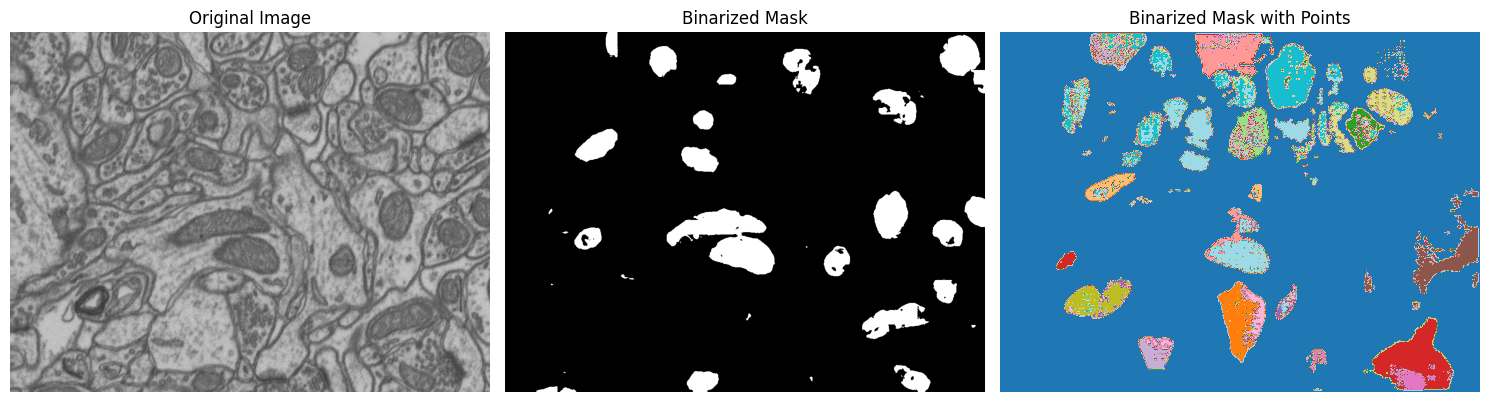

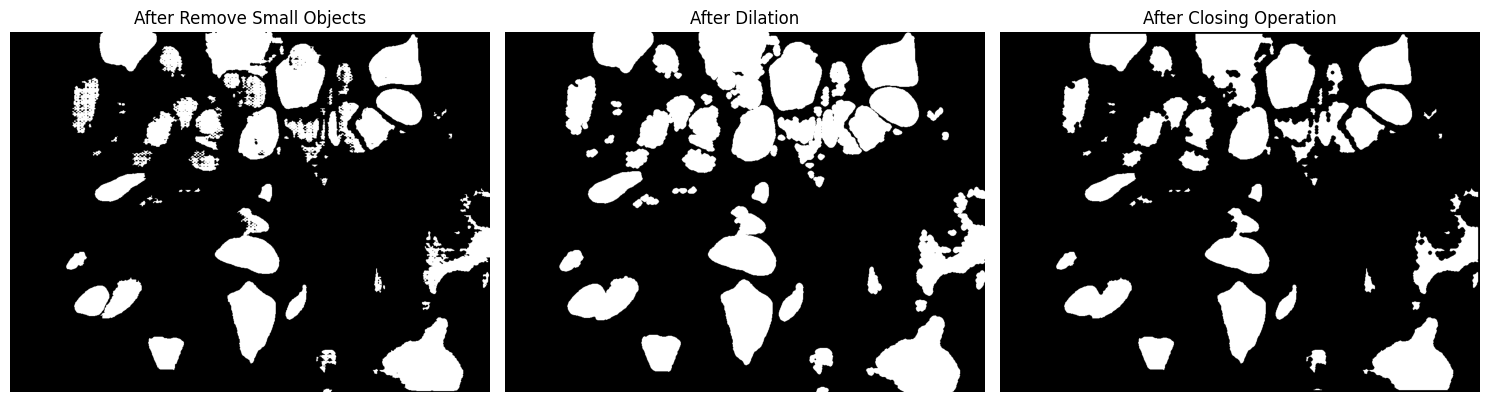

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 0.8271857598400838,
 0.15354043785406807,
 134.54877638816833)

In [10]:
from functions.samPrediction import main_prediction_process
from functions.samPrediction import build_sam2_model

sam2_model = build_sam2_model()

main_prediction_process(
    sam2_model=sam2_model,
    image=image,
    predicted_mask=predicted_mask,
    ground_truth_mask=org_mask
)